In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [22]:
data_train='/content/drive/MyDrive/Colab Notebooks/10LOAITRAICAY/TRAIN'
data_validation='/content/drive/MyDrive/Colab Notebooks/10LOAITRAICAY/TEST'
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)


In [3]:
traindata=train.flow_from_directory(data_train,
                                    target_size=(150,150),
                                    batch_size=10,
                                    class_mode='categorical',)
validationdata=validation.flow_from_directory(data_validation,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',)

Found 203 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [4]:
print(traindata.class_indices)
print(validationdata.class_indices)

{'CAM': 0, 'CHÔM CHÔM': 1, 'CHUỐI': 2, 'DƯA HẤU': 3, 'DỪA': 4, 'MẬN': 5, 'NHO': 6, 'SẦU RIÊNG': 7, 'TÁO': 8, 'THƠM': 9}
{'CAM': 0, 'CHÔM CHÔM': 1, 'CHUỐI': 2, 'DƯA HẤU': 3, 'DỪA': 4, 'MẬN': 5, 'NHO': 6, 'SẦU RIÊNG': 7, 'TÁO': 8, 'THƠM': 9}


In [7]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(traindata,batch_size=10,epochs=20,verbose=1,validation_data=validationdata)

Epoch 1/20
21/21 [==============================] - 22s 961ms/step - loss: 2.0909 - accuracy: 0.8867 - val_loss: 4.0319 - val_accuracy: 0.3500
Epoch 2/20
21/21 [==============================] - 21s 974ms/step - loss: 2.4728e-04 - accuracy: 1.0000 - val_loss: 4.0947 - val_accuracy: 0.3700
Epoch 3/20
21/21 [==============================] - 21s 990ms/step - loss: 9.1259e-05 - accuracy: 1.0000 - val_loss: 4.1884 - val_accuracy: 0.3700
Epoch 4/20
21/21 [==============================] - 21s 993ms/step - loss: 3.3300e-05 - accuracy: 1.0000 - val_loss: 4.2610 - val_accuracy: 0.3500
Epoch 5/20
21/21 [==============================] - 20s 980ms/step - loss: 1.1685e-05 - accuracy: 1.0000 - val_loss: 4.4195 - val_accuracy: 0.3500
Epoch 6/20
21/21 [==============================] - 21s 976ms/step - loss: 4.1311e-06 - accuracy: 1.0000 - val_loss: 4.5934 - val_accuracy: 0.3500
Epoch 7/20
21/21 [==============================] - 21s 979ms/step - loss: 1.1944e-06 - accuracy: 1.0000 - val_loss: 4.642

In [10]:
model.save('10LOAITRAICAY.h5')

array([1])

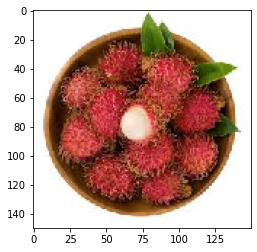

In [12]:
img=load_img('/content/images (2).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([2])

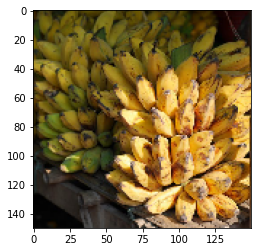

In [24]:
img=load_img('/content/bananas-banana-shrub-fruits-yellow-47305.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)